## Plots from X-ray absorption calculations using ORCA

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import csv as csv
from matplotlib.pyplot import figure
from __future__ import print_function
from matplotlib.backends.backend_agg import FigureCanvasAgg as FigureCanvas
from matplotlib.figure import Figure

____________________________

In [2]:
from scipy.optimize import leastsq
from scipy.optimize import curve_fit
from scipy.signal import find_peaks

In [3]:
plt.rcParams['axes.labelsize'] = 24
plt.rcParams['axes.titlesize'] = 24

--------------

### X-ray absorption spectra calculated using PNO-DFT/ROCIS zora

#### Pair amino acid interaction between phenylalanine (F) and tyronise (Y)

##### System of study: Phe $---$Tyr (varying inter fragment distances)

### Header test

In [3]:
fy_25 = pd.read_csv('AB_2.5A.csv', delimiter=',')
fy_25.head()
fy_25.columns = ['Energy', 'Intensity', 'dx', 'dy', 'dz']
fy_25

,Energy,Intensity,dx,dy,dz
0,288.02,0.000000,0.000000,0.000000,0.000000
1,288.04,0.000000,0.000000,0.000000,0.000000
2,288.06,0.000000,0.000000,0.000000,0.000000
3,288.08,0.000000,0.000000,0.000000,0.000000
4,288.10,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...
2994,348.92,10.573084,9.978289,0.217154,0.377642
2995,348.94,9.073653,8.563040,0.186333,0.324280
2996,348.96,7.737489,7.301925,0.158874,0.276691
2997,348.98,6.556246,6.187057,0.134602,0.234586


##### dx,dy and dz correspond to the x-, y- and z-components of the transition moment (d)

### F$---$Y ( $n=2.5, 3.0, ..., 11.0 \overset{\circ}{A}$  )
#### optimized at PM7

In [1085]:
#Uncomment the original range to see more peaks outside the expected range
file=""
post=".csv"
list_suf = [25, 26, 27, 28, 29, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100, 105, 110]
#csv_suf = [i/10 for i in list_suf]
for ii in list_suf:
    globals()['fy_%s' % str(ii)] = pd.read_csv(file+'AB_'+str(ii/10)+'A'+post, delimiter=',')
    globals()['fy_%s' % str(ii)].columns = ['Energy', 'Intensity', 'dx', 'dy', 'dz']
fy_50

,Energy,Intensity,dx,dy,dz
0,288.02,0.0,0.0,0.0,0.0
1,288.04,0.0,0.0,0.0,0.0
2,288.06,0.0,0.0,0.0,0.0
3,288.08,0.0,0.0,0.0,0.0
4,288.10,0.0,0.0,0.0,0.0
...,...,...,...,...,...
2994,348.92,0.0,0.0,0.0,0.0
2995,348.94,0.0,0.0,0.0,0.0
2996,348.96,0.0,0.0,0.0,0.0
2997,348.98,0.0,0.0,0.0,0.0


In [1086]:
list_suf = [25, 26, 27, 28, 29, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100, 105, 110]
list_suf_1 = [30, 35, 40, 45, 50, 55]
list_suf_2 = [30, 35, 40, 45, 50, 55, 60, 65]

##### Raw spectra

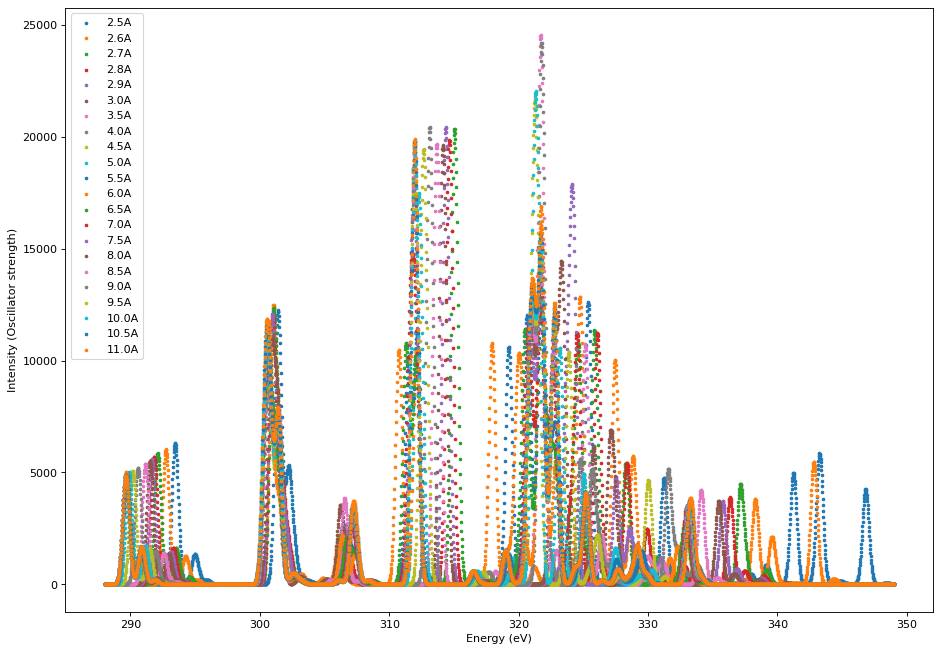

In [1087]:
#add yft and yfc to see a broader energy range
fig = plt.figure(figsize=(14, 10), dpi=80)
n1 = fig.add_subplot(111)

for ii in list_suf:
    n1.scatter(globals()['fy_%s' % str(ii)][['Energy']], globals()['fy_%s' % str(ii)][['Intensity']], s=5, label=str(ii/10)+'A')
    
plt.xlabel('Energy (eV)')
plt.ylabel('Intensity (Oscillator strength)')
plt.legend(loc='upper left');
plt.show()

In [1088]:
list_suf_longer = [70, 75, 80, 85, 90, 95, 100, 105, 110]

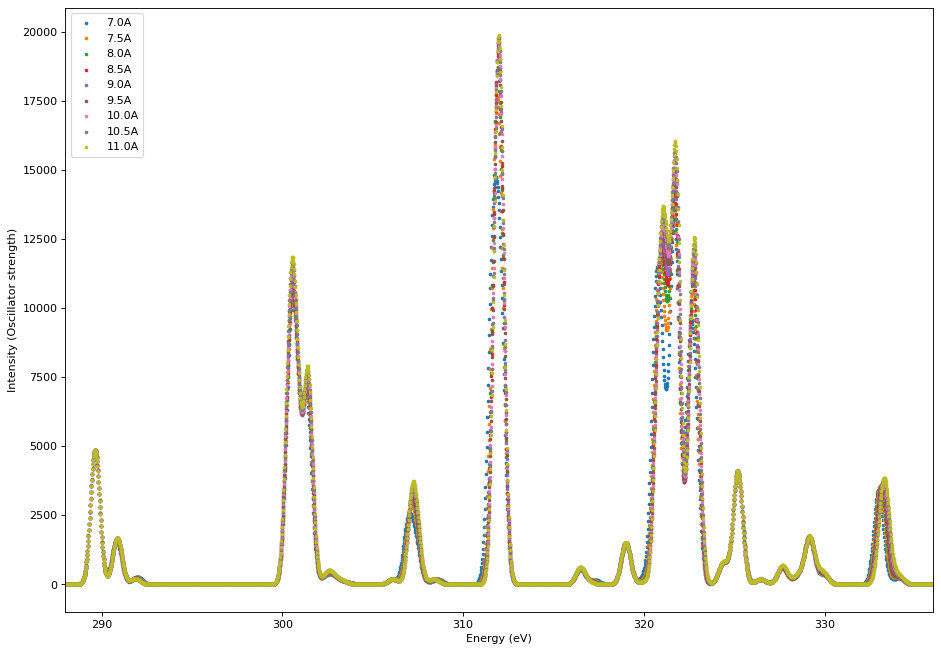

In [1089]:
#add yft and yfc to see a broader energy range
fig = plt.figure(figsize=(14, 10), dpi=80)
n2 = fig.add_subplot(111)

for ii in list_suf_longer:
    n2.scatter(globals()['fy_%s' % str(ii)][['Energy']], globals()['fy_%s' % str(ii)][['Intensity']], s=5, label=str(ii/10)+'A')
    
plt.xlabel('Energy (eV)')
plt.ylabel('Intensity (Oscillator strength)')
plt.legend(loc='upper left');
plt.xlim([288,336])
plt.show()

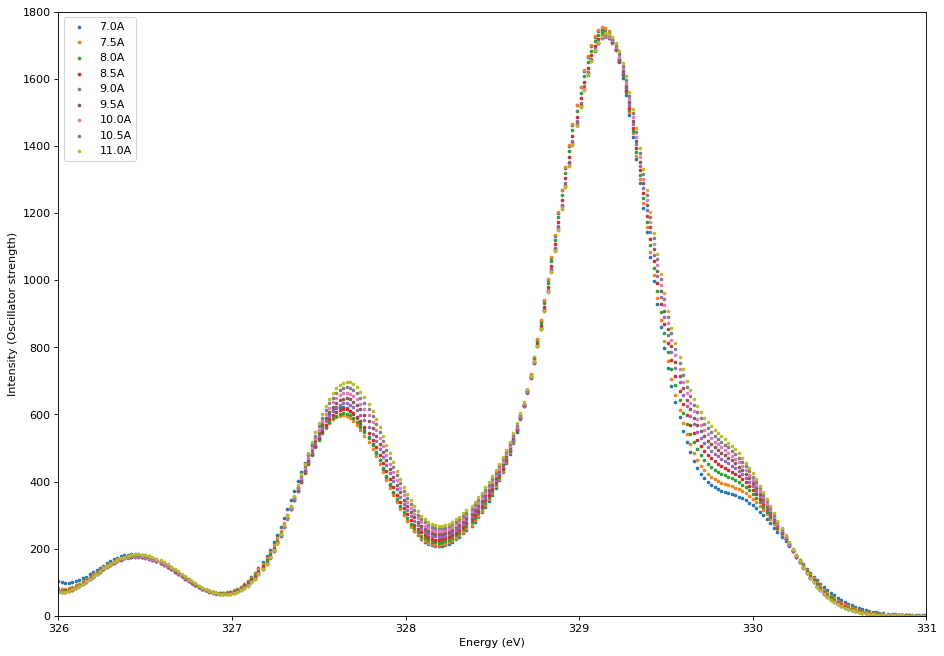

In [297]:
#add yft and yfc to see a broader energy range
fig = plt.figure(figsize=(14, 10), dpi=80)
n2 = fig.add_subplot(111)

for ii in list_suf_longer:
    n2.scatter(globals()['fy_%s' % str(ii)][['Energy']], globals()['fy_%s' % str(ii)][['Intensity']], s=5, label=str(ii/10)+'A')
    
plt.xlabel('Energy (eV)')
plt.ylabel('Intensity (Oscillator strength)')
plt.legend(loc='upper left');
#first peak
#plt.xlim([289,290.3]) #no changes
#plt.ylim([0,5000])
#second peak
#plt.xlim([290.3,291.5]) #no changes (~200 intensity units changes)
#plt.ylim([0,1700])
#third peak
#plt.xlim([299.5,302.3]) #changes! (~2000 intensity units changes)
#plt.ylim([0,12500])
#fourth peak
#plt.xlim([305.5,309]) #changes! (~1000 intensity units changes)
#plt.ylim([0,4000])
#fifth peak
#plt.xlim([310.7,313]) #changes! (~5000 intensity units changes)
#plt.ylim([0,21000])
#sixth peak
#plt.xlim([315.5,318]) #no changes (~100 intensity units changes)
#plt.ylim([0,650])
#seventh peak
#plt.xlim([318.2,319.6]) #no changes
#plt.ylim([0,1700])
#eighth peak
#plt.xlim([319.7,323.7]) #changes (~5000 intensity units changes)
#plt.ylim([0,17000])
#ninth peak
#plt.xlim([323.8,326]) #no changes
#plt.ylim([0,4500])
#tenth peak
plt.xlim([326,331]) #no changes (~100 intensity units changes)
plt.ylim([0,1800])
#eleventh peak
#plt.xlim([332,335]) #no changes (~100 intensity units changes)
#plt.ylim([0,4000])
#twelfth peak
#plt.xlim([336,338]) #no changes (~10 intensity units changes)
#plt.ylim([0,50])
plt.show()

In [276]:
list_suf_middle = [55, 60, 65]

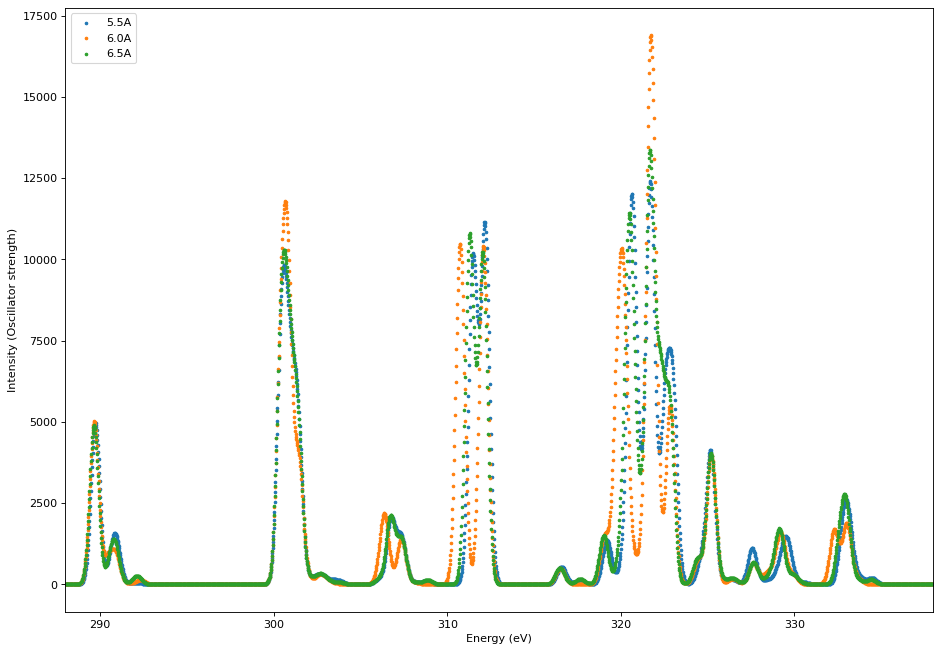

In [277]:
fig = plt.figure(figsize=(14, 10), dpi=80)
n3 = fig.add_subplot(111)

for ii in list_suf_middle:
    n3.scatter(globals()['fy_%s' % str(ii)][['Energy']], globals()['fy_%s' % str(ii)][['Intensity']], s=5, label=str(ii/10)+'A')
    
plt.xlabel('Energy (eV)')
plt.ylabel('Intensity (Oscillator strength)')
plt.legend(loc='upper left');
plt.xlim([288,338])
#plt.xlim([288,320])
plt.show()

In [554]:
list_suf_short = [25, 30, 35, 40, 45]#[30, 35, 40, 45, 50]#[25, 

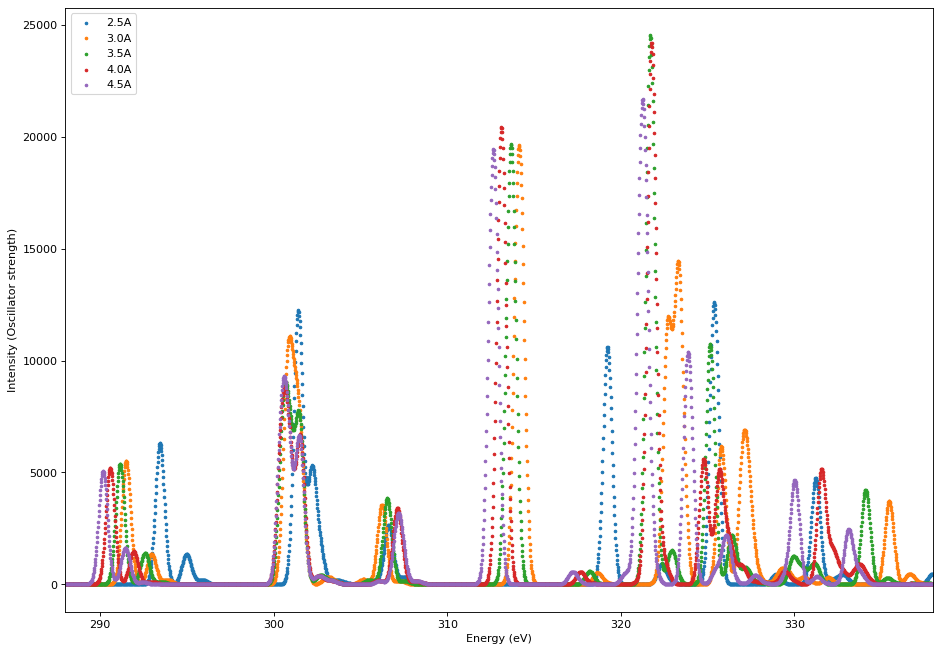

In [555]:
fig = plt.figure(figsize=(14, 10), dpi=80)
n3 = fig.add_subplot(111)

for ii in list_suf_short:
    n3.scatter(globals()['fy_%s' % str(ii)][['Energy']], globals()['fy_%s' % str(ii)][['Intensity']], s=5, label=str(ii/10)+'A')
    
plt.xlabel('Energy (eV)')
plt.ylabel('Intensity (Oscillator strength)')
plt.legend(loc='upper left');
plt.xlim([288,338])
plt.show()


### First section
#### First and second peaks

In [1090]:
list_suf_short1 = [25, 26, 27, 28, 29, 30, 35, 40, 45, 50, 55]
list_suf_long1 = [60, 65, 70, 75, 80, 85, 90, 95, 100, 105, 110]

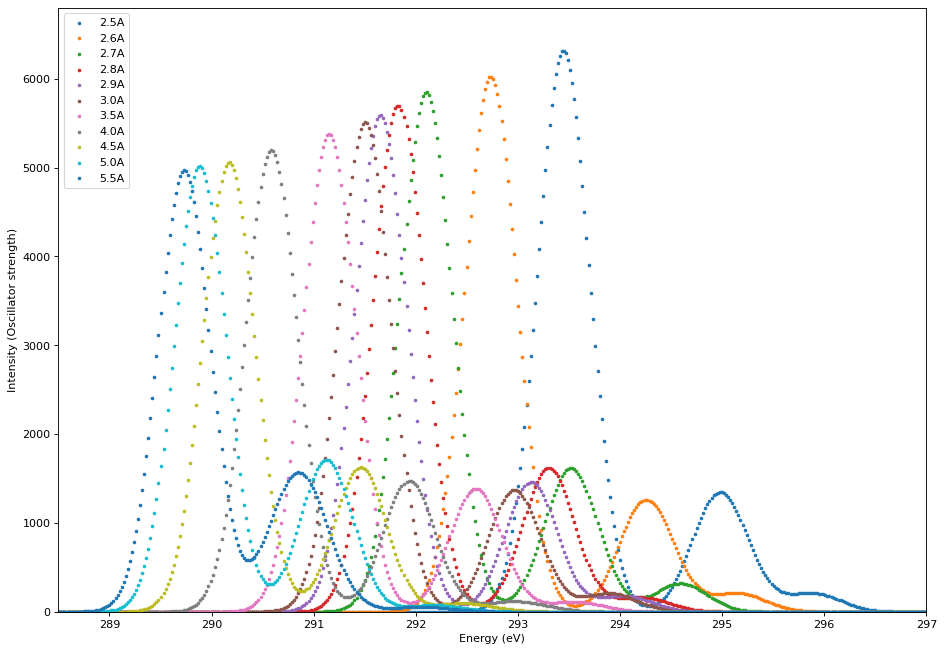

In [1091]:
#add yft and yfc to see a broader energy range
fig = plt.figure(figsize=(14, 10), dpi=80)
n5 = fig.add_subplot(111)

for ii in list_suf_short1:
    n5.scatter(globals()['fy_%s' % str(ii)][['Energy']], globals()['fy_%s' % str(ii)][['Intensity']], s=5, label=str(ii/10)+'A')
    
plt.xlabel('Energy (eV)')
plt.ylabel('Intensity (Oscillator strength)')
plt.legend(loc='upper left');
#first peak
plt.xlim([288.5,297]) #no changes
plt.ylim([0,6800])
plt.show()

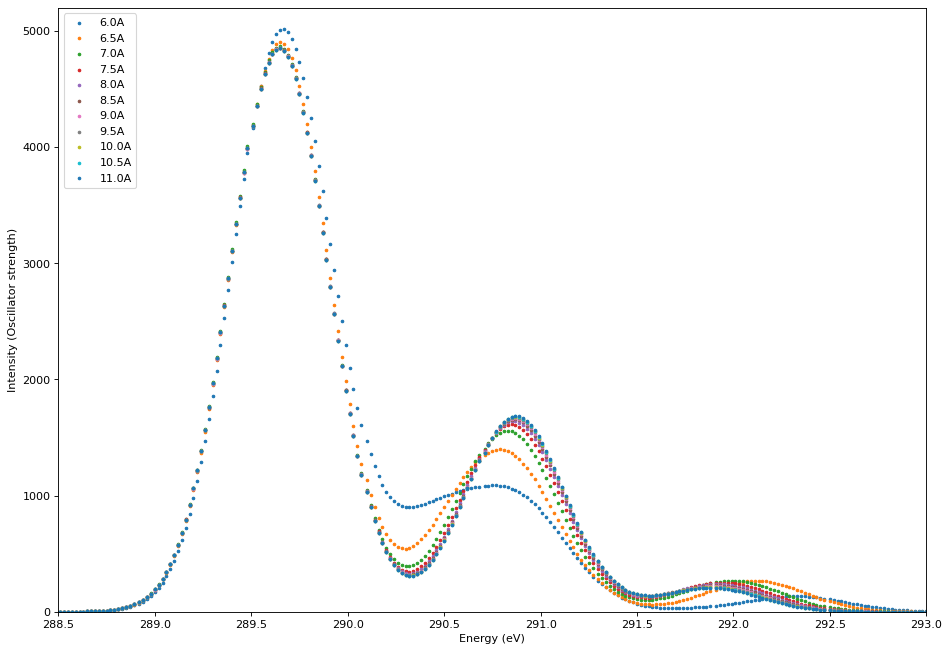

In [991]:
#add yft and yfc to see a broader energy range
fig = plt.figure(figsize=(14, 10), dpi=80)
n5 = fig.add_subplot(111)

for ii in list_suf_long1:
    n5.scatter(globals()['fy_%s' % str(ii)][['Energy']], globals()['fy_%s' % str(ii)][['Intensity']], s=5, label=str(ii/10)+'A')
    
plt.xlabel('Energy (eV)')
plt.ylabel('Intensity (Oscillator strength)')
plt.legend(loc='upper left');
#first peak
plt.xlim([288.5,293]) #no changes
plt.ylim([0,5200])
plt.show()

In [1084]:
fy_30[['Energy','Intensity']][0:400].max()

Energy        296.14000
Intensity    5512.88573
dtype: float64

### Second section
#### Third peak

In [1174]:
list_suf_short2 = [25, 26, 27, 28, 29, 30, 35, 40]
list_suf_middle2 = [30, 35, 40, 45, 50, 55, 60, 65]
list_suf_long2 = [60, 65, 70, 75, 80, 85, 90, 95, 100, 105, 110]

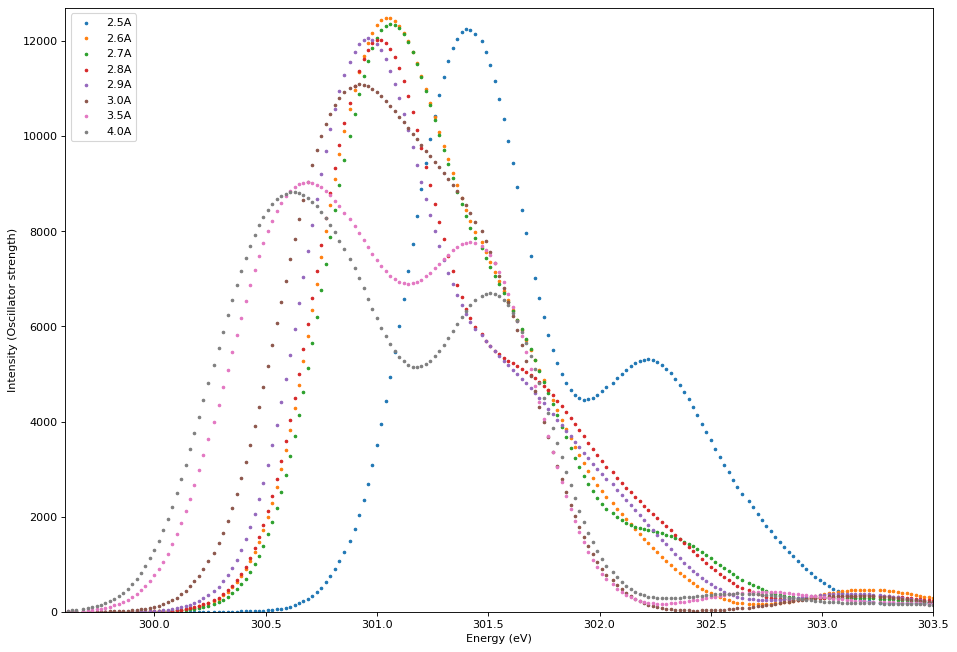

In [1169]:
#add yft and yfc to see a broader energy range
fig = plt.figure(figsize=(14, 10), dpi=80)
n5 = fig.add_subplot(111)

for ii in list_suf_short2:
    n5.scatter(globals()['fy_%s' % str(ii)][['Energy']], globals()['fy_%s' % str(ii)][['Intensity']], s=5, label=str(ii/10)+'A')
    
plt.xlabel('Energy (eV)')
plt.ylabel('Intensity (Oscillator strength)')
plt.legend(loc='upper left');
#second section
plt.xlim([299.6,303.5]) #no changes
plt.ylim([0,12700])
plt.show()

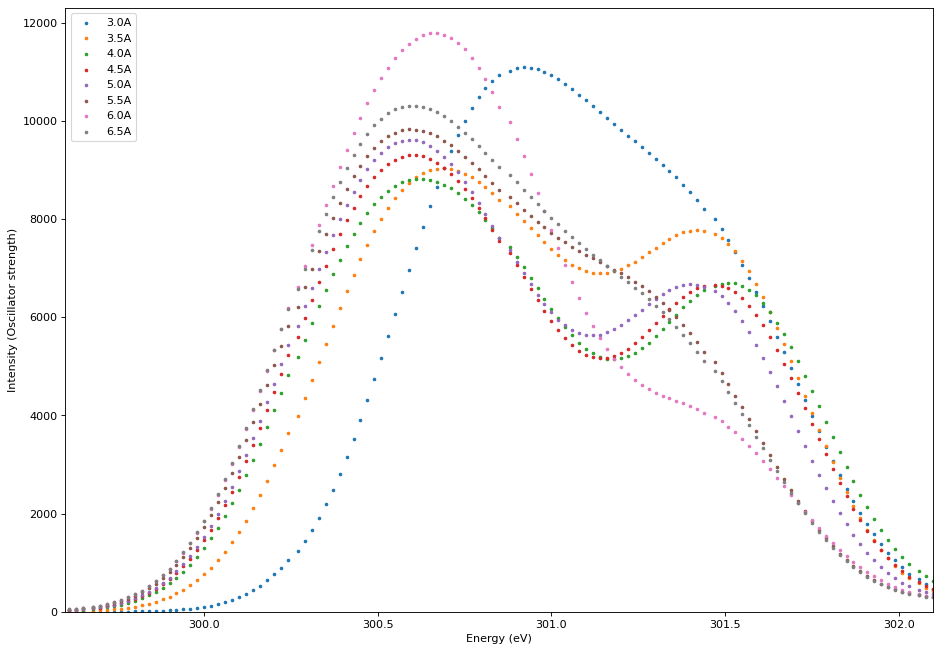

In [1175]:
#add yft and yfc to see a broader energy range
fig = plt.figure(figsize=(14, 10), dpi=80)
n5 = fig.add_subplot(111)

for ii in list_suf_middle2:
    n5.scatter(globals()['fy_%s' % str(ii)][['Energy']], globals()['fy_%s' % str(ii)][['Intensity']], s=5, label=str(ii/10)+'A')
    
plt.xlabel('Energy (eV)')
plt.ylabel('Intensity (Oscillator strength)')
plt.legend(loc='upper left');
#second section
plt.xlim([299.6,302.1]) #no changes
plt.ylim([0,12300])
plt.show()

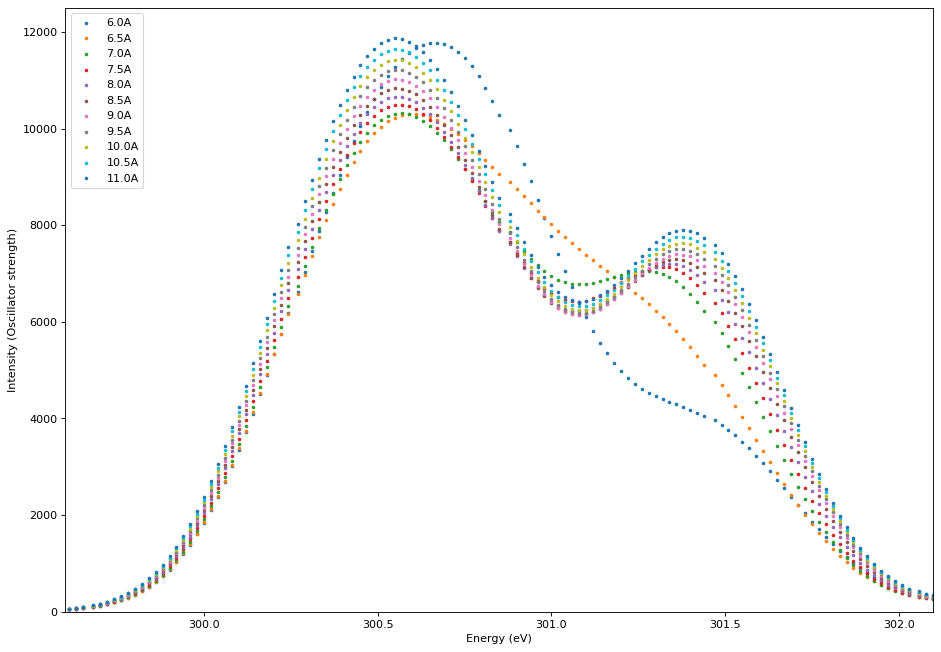

In [1173]:
#add yft and yfc to see a broader energy range
fig = plt.figure(figsize=(14, 10), dpi=80)
n5 = fig.add_subplot(111)

for ii in list_suf_long2:
    n5.scatter(globals()['fy_%s' % str(ii)][['Energy']], globals()['fy_%s' % str(ii)][['Intensity']], s=5, label=str(ii/10)+'A')
    
plt.xlabel('Energy (eV)')
plt.ylabel('Intensity (Oscillator strength)')
plt.legend(loc='upper left');
#first peak
plt.xlim([299.6,302.1]) #no changes
plt.ylim([0,12500])
plt.show()

### Third section
#### Fourth peak

In [1094]:
list_suf_shorter3 = [25, 26, 27, 28, 29, 30]
list_suf_short3 = [30, 35, 40, 45, 50]
list_suf_outlier3 = [25, 55, 60]
list_suf_long3 = [65, 70, 75, 80, 85, 90, 95, 100, 105, 110]

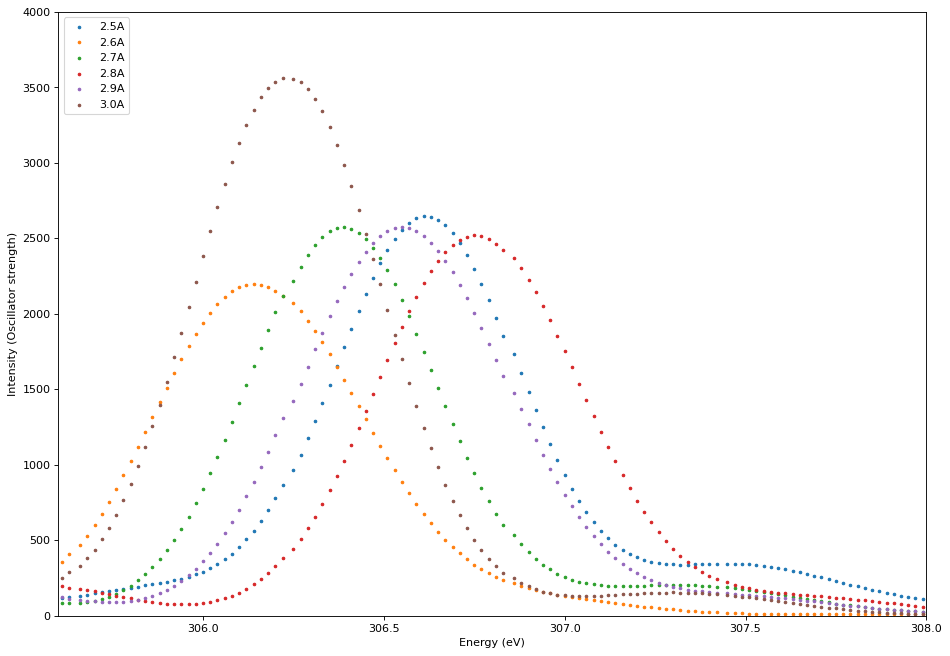

In [1095]:
#add yft and yfc to see a broader energy range
fig = plt.figure(figsize=(14, 10), dpi=80)
n5 = fig.add_subplot(111)

for ii in list_suf_shorter3:
    n5.scatter(globals()['fy_%s' % str(ii)][['Energy']], globals()['fy_%s' % str(ii)][['Intensity']], s=5, label=str(ii/10)+'A')
    
plt.xlabel('Energy (eV)')
plt.ylabel('Intensity (Oscillator strength)')
plt.legend(loc='upper left');
#first peak
plt.xlim([305.6,308]) #no changes
plt.ylim([0,4000])
#fourth peak
#plt.xlim([305.5,309]) #changes! (~1000 intensity units changes)
#plt.ylim([0,3000])
plt.show()

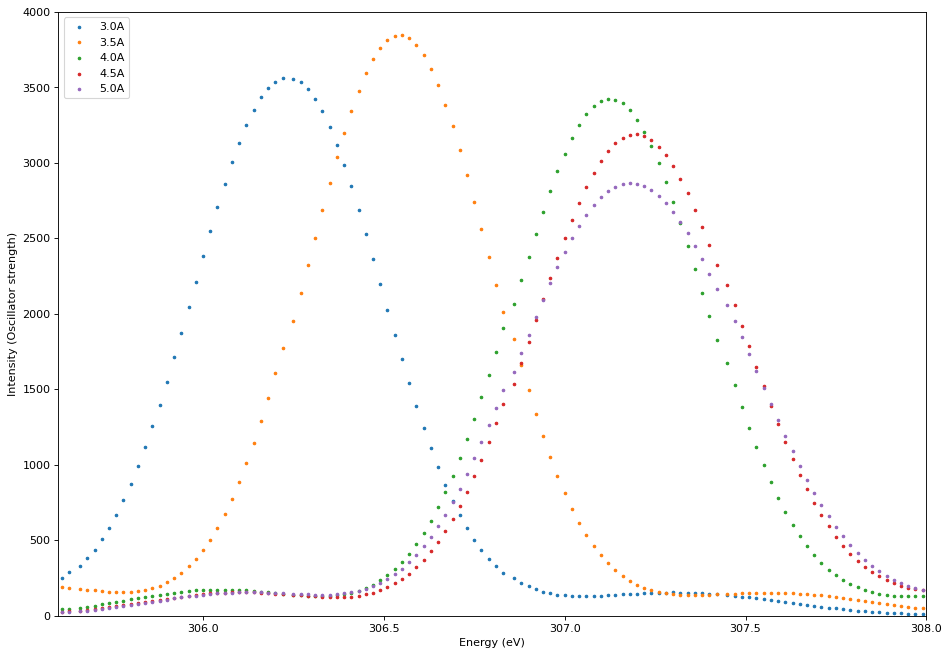

In [528]:
#add yft and yfc to see a broader energy range
fig = plt.figure(figsize=(14, 10), dpi=80)
n5 = fig.add_subplot(111)

for ii in list_suf_short3:
    n5.scatter(globals()['fy_%s' % str(ii)][['Energy']], globals()['fy_%s' % str(ii)][['Intensity']], s=5, label=str(ii/10)+'A')
    
plt.xlabel('Energy (eV)')
plt.ylabel('Intensity (Oscillator strength)')
plt.legend(loc='upper left');
#first peak
plt.xlim([305.6,308]) #no changes
plt.ylim([0,4000])
#fourth peak
#plt.xlim([305.5,309]) #changes! (~1000 intensity units changes)
#plt.ylim([0,3000])
plt.show()

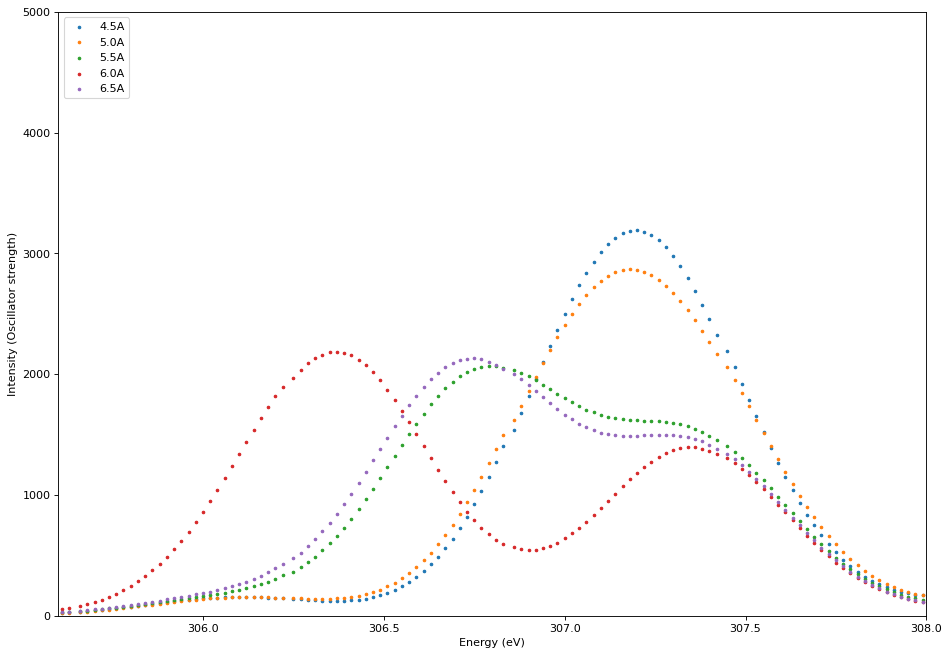

In [492]:
#add yft and yfc to see a broader energy range
fig = plt.figure(figsize=(14, 10), dpi=80)
n5 = fig.add_subplot(111)

for ii in list_suf_middle3:
    n5.scatter(globals()['fy_%s' % str(ii)][['Energy']], globals()['fy_%s' % str(ii)][['Intensity']], s=5, label=str(ii/10)+'A')
    
plt.xlabel('Energy (eV)')
plt.ylabel('Intensity (Oscillator strength)')
plt.legend(loc='upper left');
#first peak
plt.xlim([305.6,308]) #no changes
plt.ylim([0,5000])
plt.show()

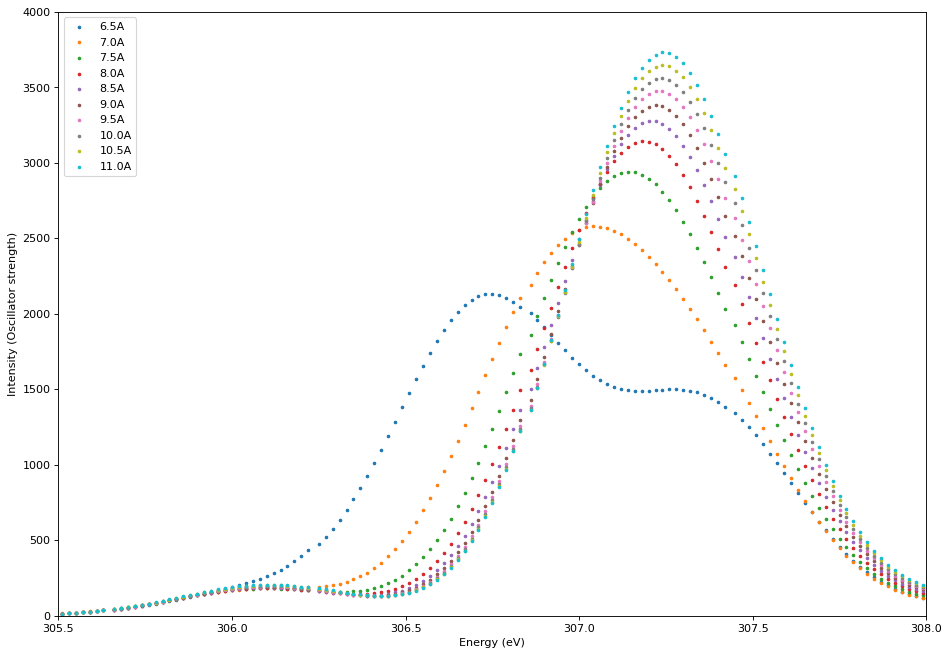

In [495]:
#add yft and yfc to see a broader energy range
fig = plt.figure(figsize=(14, 10), dpi=80)
n5 = fig.add_subplot(111)

for ii in list_suf_long3:
    n5.scatter(globals()['fy_%s' % str(ii)][['Energy']], globals()['fy_%s' % str(ii)][['Intensity']], s=5, label=str(ii/10)+'A')
    
plt.xlabel('Energy (eV)')
plt.ylabel('Intensity (Oscillator strength)')
plt.legend(loc='upper left');
#first peak
plt.xlim([305.5,308]) #no changes
plt.ylim([0,4000])
plt.show()

### Fourth section
#### Fifth peak

In [1098]:
list_suf_short4 = [25, 26, 27, 28, 29, 30, 35, 40, 45, 50, 55]
list_suf_long4 = [60, 65, 70, 75, 80, 85, 90, 95, 100, 105, 110]

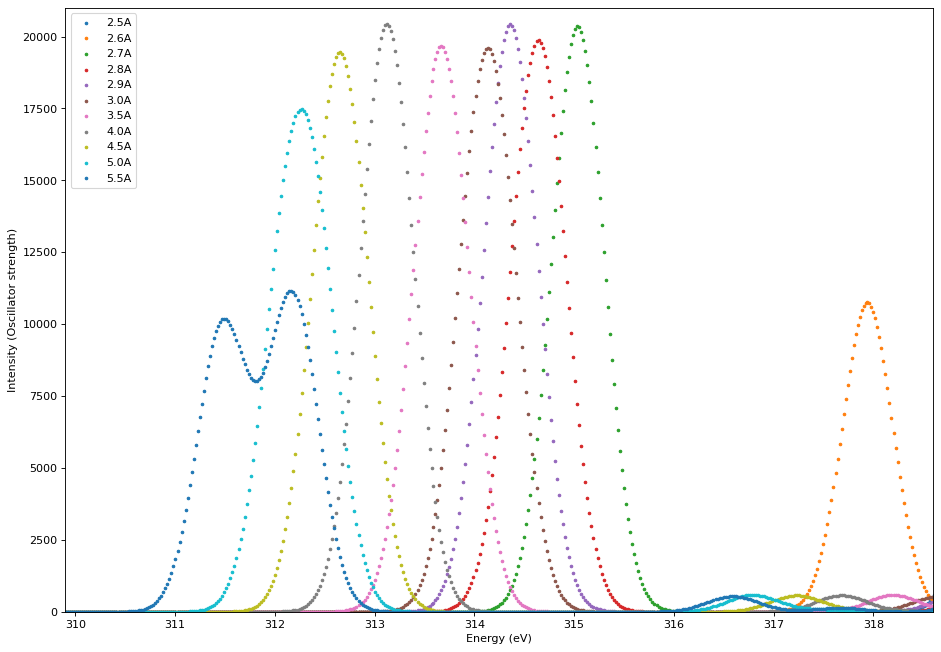

In [1106]:
fig = plt.figure(figsize=(14, 10), dpi=80)
n5 = fig.add_subplot(111)

for ii in list_suf_short4:
    n5.scatter(globals()['fy_%s' % str(ii)][['Energy']], globals()['fy_%s' % str(ii)][['Intensity']], s=5, label=str(ii/10)+'A')
    
plt.xlabel('Energy (eV)')
plt.ylabel('Intensity (Oscillator strength)')
plt.legend(loc='upper left');
plt.xlim([309.9,318.6])#315
plt.ylim([0,21000])
#fifth peak
#plt.xlim([310.7,313]) #changes! (~5000 intensity units changes)
#plt.ylim([0,21000])
plt.show()

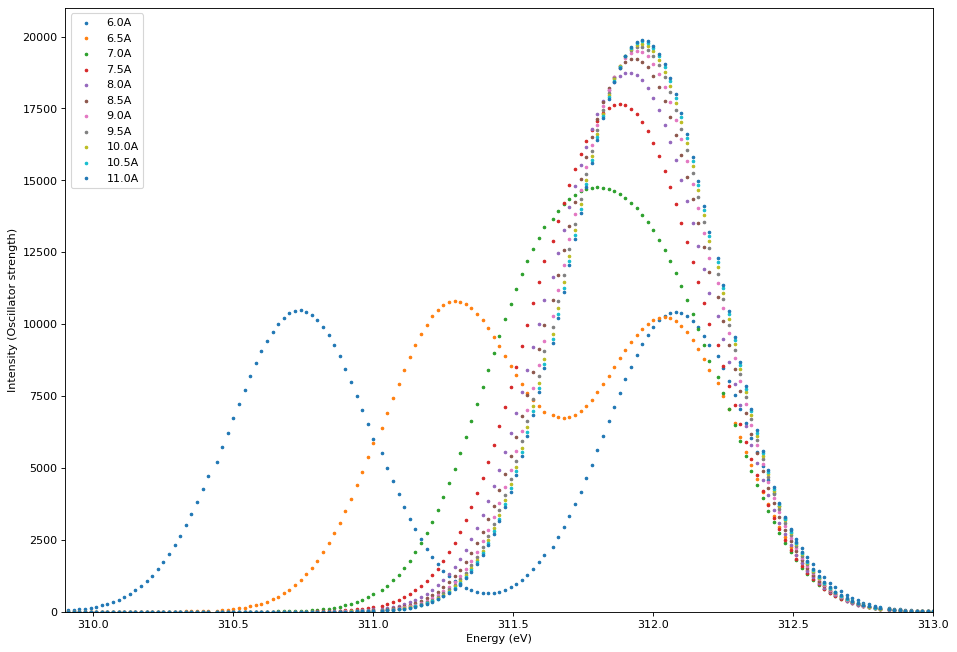

In [577]:
fig = plt.figure(figsize=(14, 10), dpi=80)
n5 = fig.add_subplot(111)

for ii in list_suf_long4:
    n5.scatter(globals()['fy_%s' % str(ii)][['Energy']], globals()['fy_%s' % str(ii)][['Intensity']], s=5, label=str(ii/10)+'A')
    
plt.xlabel('Energy (eV)')
plt.ylabel('Intensity (Oscillator strength)')
plt.legend(loc='upper left');
#plt.xlim([309.9,315.1])
plt.xlim([309.9,313])
plt.ylim([0,21000])
plt.show()

### Fifth section
#### sixth and seventh peaks

In [1136]:
list_suf_long5 = [27, 28, 29, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100, 105, 110]
list_suf_outlier5 = [25, 26, 27, 28, 29, 30, 35, 40, 45]

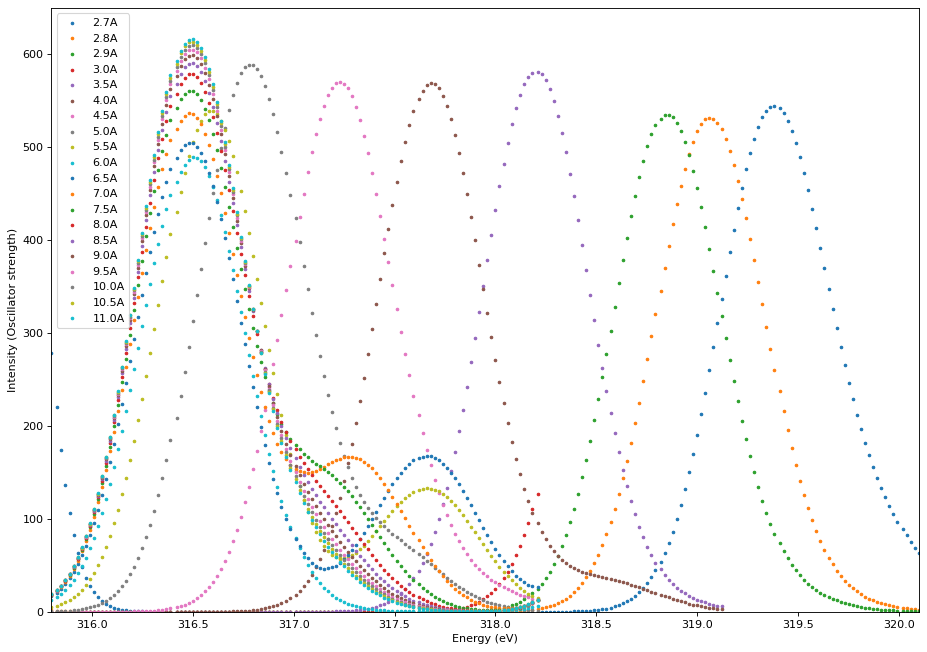

In [1133]:
fig = plt.figure(figsize=(14, 10), dpi=80)
n5 = fig.add_subplot(111)

for ii in list_suf_long5:
    if ii<30:
        n5.scatter(globals()['fy_%s' % str(ii)][['Energy']][:1630], globals()['fy_%s' % str(ii)][['Intensity']][:1630], s=5, label=str(ii/10)+'A')
    elif ii<45 and ii>30:
        n5.scatter(globals()['fy_%s' % str(ii)][['Energy']][:1530], globals()['fy_%s' % str(ii)][['Intensity']][:1530], s=5, label=str(ii/10)+'A')
    else:
        n5.scatter(globals()['fy_%s' % str(ii)][['Energy']][:1485], globals()['fy_%s' % str(ii)][['Intensity']][:1485], s=5, label=str(ii/10)+'A')
    
plt.xlabel('Energy (eV)')
plt.ylabel('Intensity (Oscillator strength)')
plt.legend(loc='upper left');
plt.xlim([315.8,320.1])
plt.ylim([0,650])
#sixth peak
#plt.xlim([315.5,318]) #no changes (~100 intensity units changes)
#plt.ylim([0,650])
#seventh peak
#plt.xlim([318.2,319.6]) #no changes
#plt.ylim([0,1700])
plt.show()

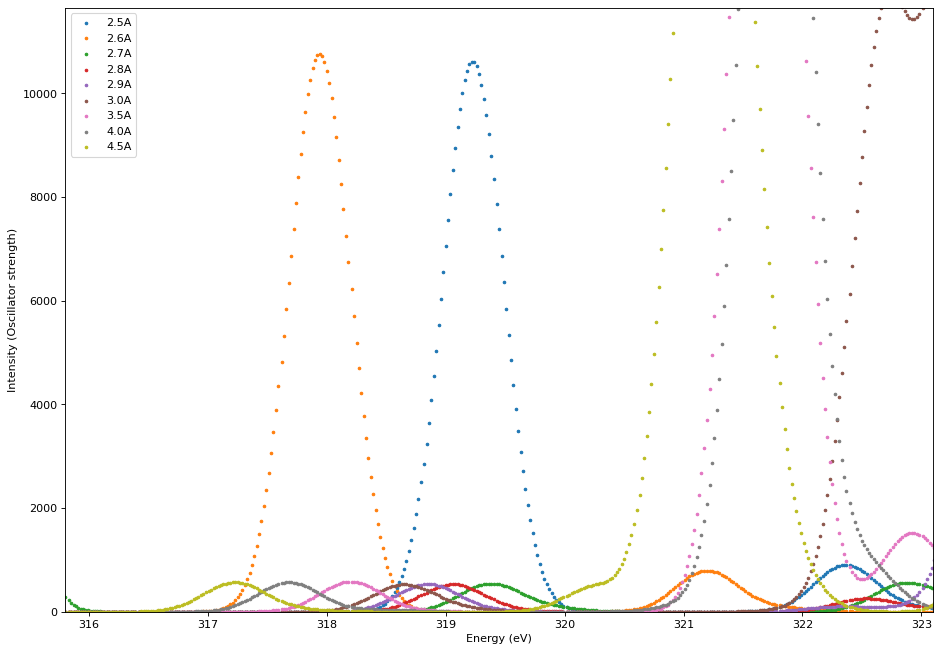

In [1137]:
fig = plt.figure(figsize=(14, 10), dpi=80)
n5 = fig.add_subplot(111)

for ii in list_suf_outlier5:
        n5.scatter(globals()['fy_%s' % str(ii)][['Energy']], globals()['fy_%s' % str(ii)][['Intensity']], s=5, label=str(ii/10)+'A')
    
plt.xlabel('Energy (eV)')
plt.ylabel('Intensity (Oscillator strength)')
plt.legend(loc='upper left');
plt.xlim([315.8,323.1])
plt.ylim([0,11650])
plt.show()

### Sixth section
#### eighth and ninth peaks

In [1138]:
list_suf_short6 = [35, 40, 45]
list_suf_outlier6 = [25, 26, 27, 28, 29, 30]
list_suf_middle6 = [50, 55, 60]
list_suf_long6 = [65, 70, 75, 80, 85, 90, 95, 100, 105, 110]

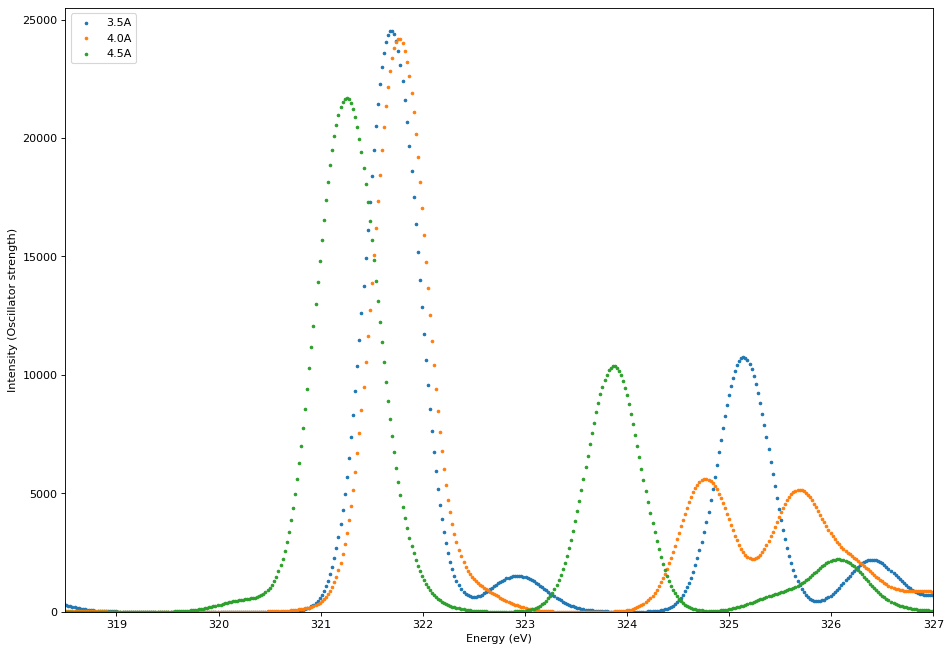

In [841]:
fig = plt.figure(figsize=(14, 10), dpi=80)
n5 = fig.add_subplot(111)

for ii in list_suf_short6:
    n5.scatter(globals()['fy_%s' % str(ii)][['Energy']], globals()['fy_%s' % str(ii)][['Intensity']], s=5, label=str(ii/10)+'A')

plt.xlabel('Energy (eV)')
plt.ylabel('Intensity (Oscillator strength)')
plt.legend(loc='upper left');
plt.xlim([318.5,327])
plt.ylim([0,25500])
#eighth peak
#plt.xlim([319.7,323.7]) #changes (~5000 intensity units changes)
#plt.ylim([0,19000])
#ninth peak
#plt.xlim([323.8,326]) #no changes
#plt.ylim([0,4500])
plt.show()

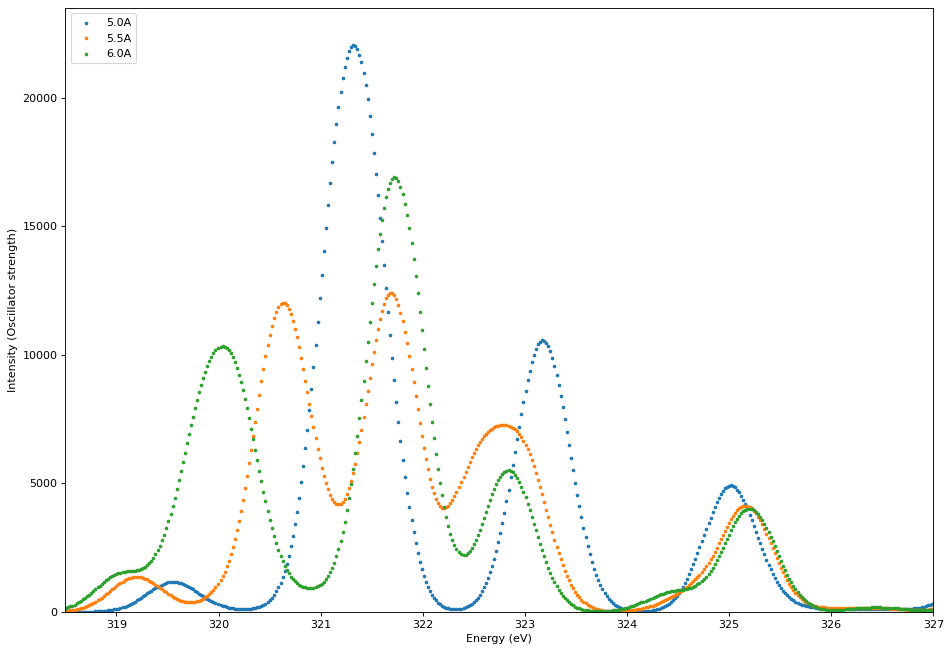

In [842]:
fig = plt.figure(figsize=(14, 10), dpi=80)
n5 = fig.add_subplot(111)

for ii in list_suf_middle6:
    n5.scatter(globals()['fy_%s' % str(ii)][['Energy']], globals()['fy_%s' % str(ii)][['Intensity']], s=5, label=str(ii/10)+'A')
    
plt.xlabel('Energy (eV)')
plt.ylabel('Intensity (Oscillator strength)')
plt.legend(loc='upper left');
plt.xlim([318.5,327])
plt.ylim([0,23500])

plt.show()

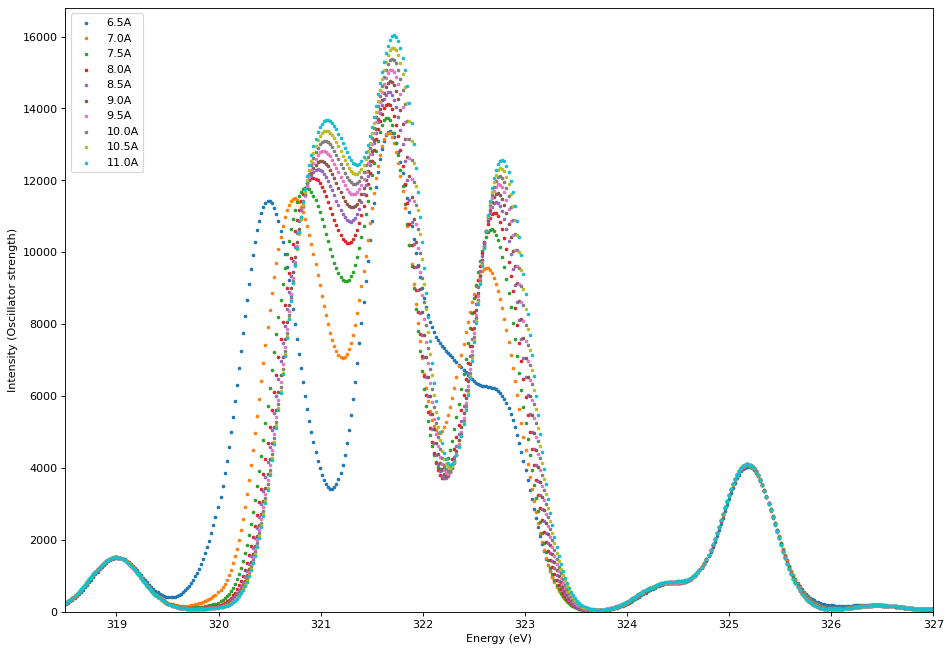

In [843]:
fig = plt.figure(figsize=(14, 10), dpi=80)
n5 = fig.add_subplot(111)

for ii in list_suf_long6:
    n5.scatter(globals()['fy_%s' % str(ii)][['Energy']], globals()['fy_%s' % str(ii)][['Intensity']], s=5, label=str(ii/10)+'A')
    
plt.xlabel('Energy (eV)')
plt.ylabel('Intensity (Oscillator strength)')
plt.legend(loc='upper left');
plt.xlim([318.5,327])
plt.ylim([0,16800])

plt.show()

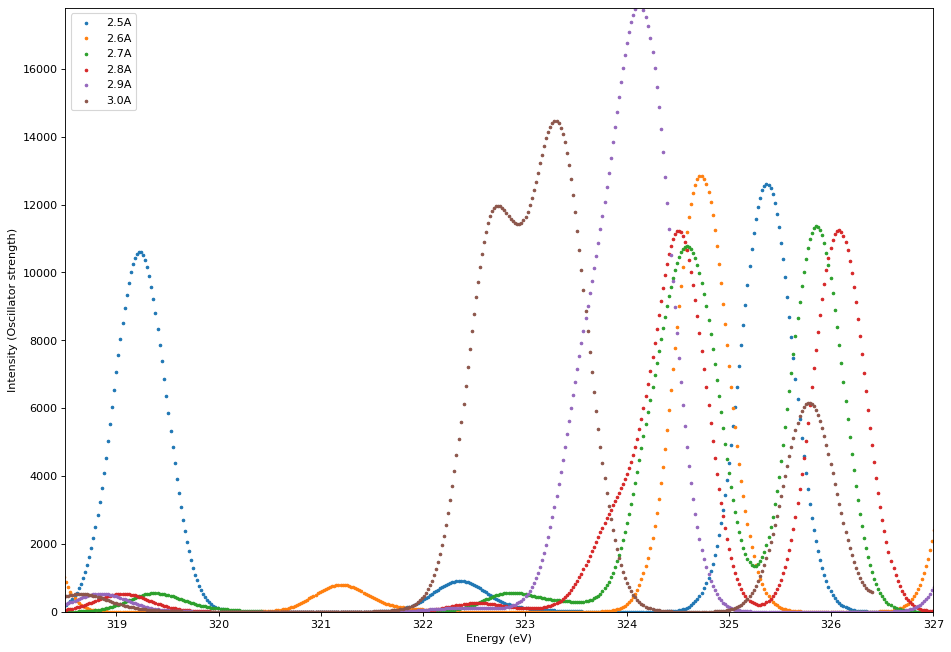

In [1176]:
fig = plt.figure(figsize=(14, 10), dpi=80)
n5 = fig.add_subplot(111)

for ii in list_suf_outlier6:
    if 30>ii:
        n5.scatter(globals()['fy_%s' % str(ii)][['Energy']], globals()['fy_%s' % str(ii)][['Intensity']], s=5, label=str(ii/10)+'A')
    else:
        n5.scatter(globals()['fy_%s' % str(ii)][['Energy']][:1888], globals()['fy_%s' % str(ii)][['Intensity']][:1888], s=5, label=str(ii/10)+'A')
    
plt.xlabel('Energy (eV)')
plt.ylabel('Intensity (Oscillator strength)')
plt.legend(loc='upper left');
plt.xlim([318.5,327])
plt.ylim([0,17800])

plt.show()

### Seventh section
#### tenth peak

In [1177]:
list_suf_middle7 = [50, 55, 60, 65]
list_suf_long7 = [65, 70, 75, 80, 85, 90, 95, 100, 105, 110]
list_suf_outlier7 = [25, 26, 27, 28, 29, 30, 35, 40, 45]

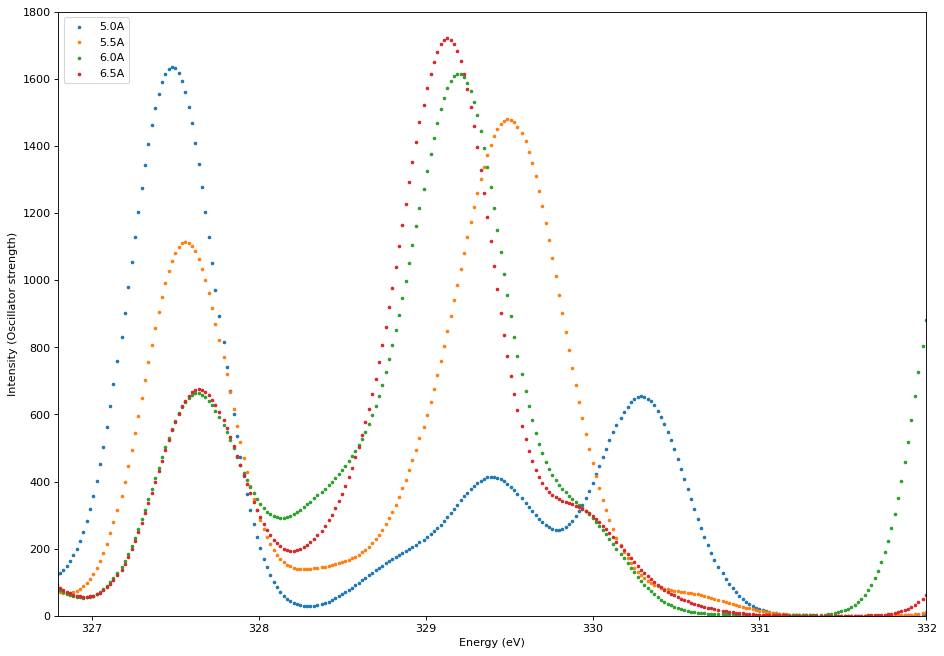

In [1020]:
fig = plt.figure(figsize=(14, 10), dpi=80)
n5 = fig.add_subplot(111)

for ii in list_suf_middle7:
    n5.scatter(globals()['fy_%s' % str(ii)][['Energy']], globals()['fy_%s' % str(ii)][['Intensity']], s=5, label=str(ii/10)+'A')
    
plt.xlabel('Energy (eV)')
plt.ylabel('Intensity (Oscillator strength)')
plt.legend(loc='upper left');
plt.xlim([326.8,332])#331
plt.ylim([0,1800])
#tenth peak
#plt.xlim([326,331]) #no changes (~100 intensity units changes)
#plt.ylim([0,1800])
plt.show()

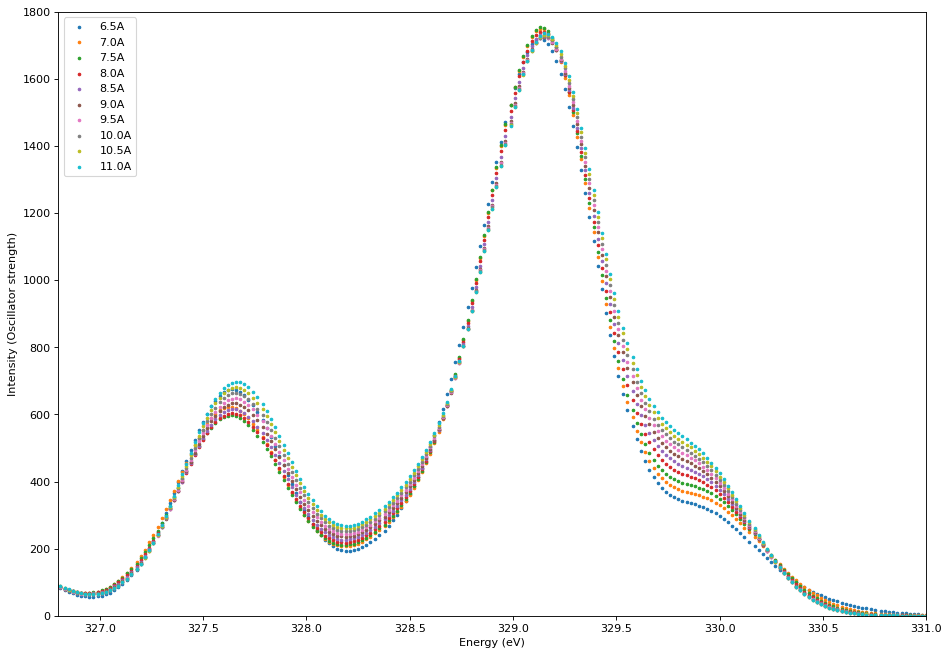

In [932]:
fig = plt.figure(figsize=(14, 10), dpi=80)
n5 = fig.add_subplot(111)

for ii in list_suf_long7:
    n5.scatter(globals()['fy_%s' % str(ii)][['Energy']], globals()['fy_%s' % str(ii)][['Intensity']], s=5, label=str(ii/10)+'A')
    
plt.xlabel('Energy (eV)')
plt.ylabel('Intensity (Oscillator strength)')
plt.legend(loc='upper left');
plt.xlim([326.8,331])
plt.ylim([0,1800])

plt.show()

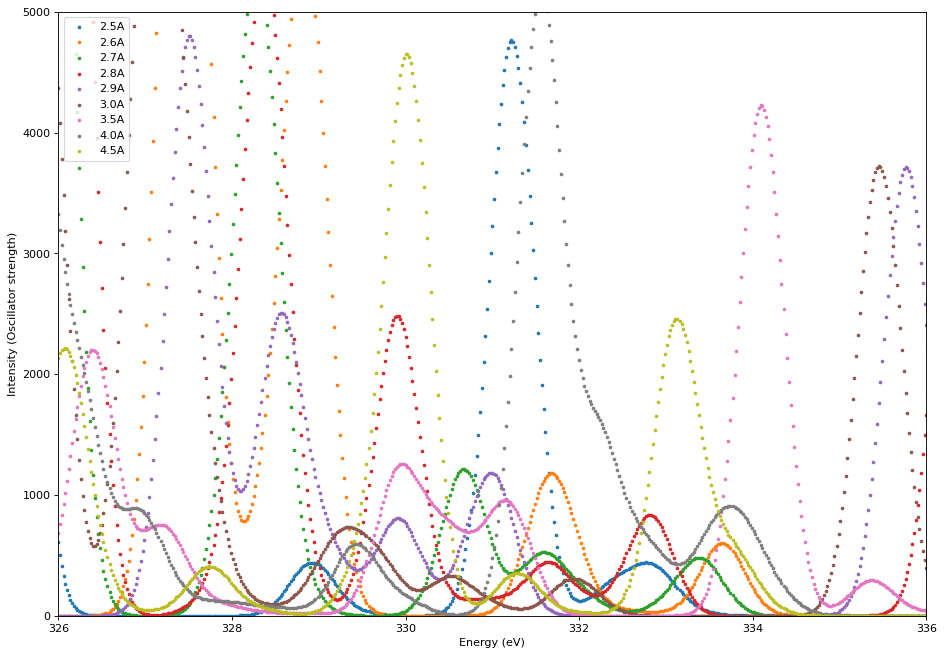

In [1178]:
fig = plt.figure(figsize=(14, 10), dpi=80)
n5 = fig.add_subplot(111)

for ii in list_suf_outlier7:
    
    n5.scatter(globals()['fy_%s' % str(ii)][['Energy']], globals()['fy_%s' % str(ii)][['Intensity']], s=5, label=str(ii/10)+'A')
    
plt.xlabel('Energy (eV)')
plt.ylabel('Intensity (Oscillator strength)')
plt.legend(loc='upper left');
plt.xlim([326,336])
plt.ylim([0,5000])

plt.show()

### Eighth section
#### eleventh and twelfth peaks

In [1185]:
list_suf_outlier8 = [25, 26, 27, 28, 29, 30, 35, 40, 45]
list_suf_middle8 = [40, 45, 50, 55, 60, 65]
list_suf_long8 = [60, 65, 70, 75, 80, 85, 90, 95, 100, 105, 110]

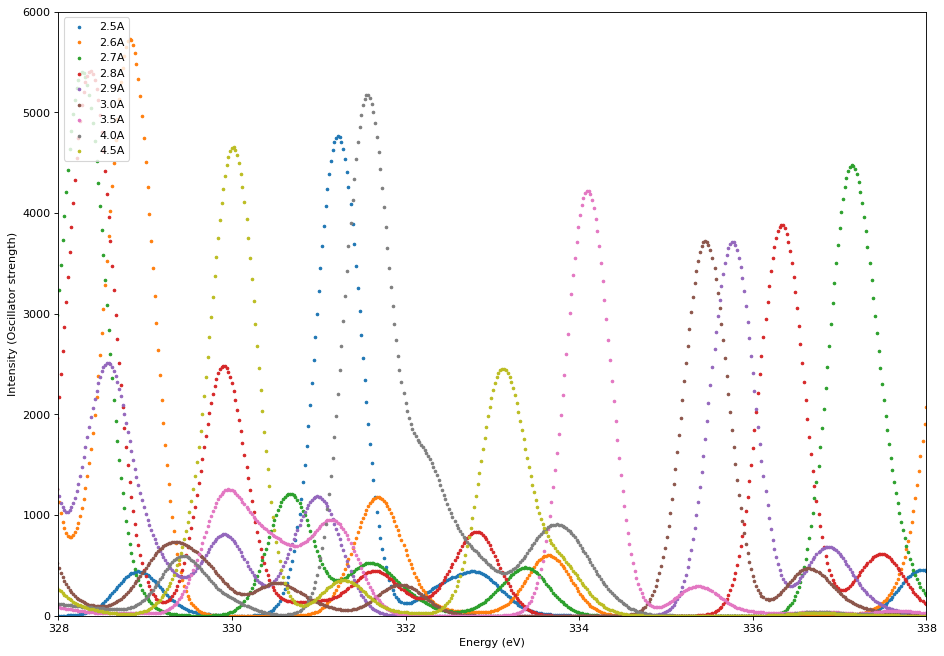

In [1186]:
fig = plt.figure(figsize=(14, 10), dpi=80)
n5 = fig.add_subplot(111)

for ii in list_suf_outlier8:
    n5.scatter(globals()['fy_%s' % str(ii)][['Energy']], globals()['fy_%s' % str(ii)][['Intensity']], s=5, label=str(ii/10)+'A')
    
plt.xlabel('Energy (eV)')
plt.ylabel('Intensity (Oscillator strength)')
plt.legend(loc='upper left');
plt.xlim([328,338])#348
plt.ylim([0,6000])
#eleventh peak
#plt.xlim([332,335]) #no changes (~100 intensity units changes)
#plt.ylim([0,4000])
#twelfth peak
#plt.xlim([336,338]) #no changes (~10 intensity units changes)
#plt.ylim([0,50])
plt.show()

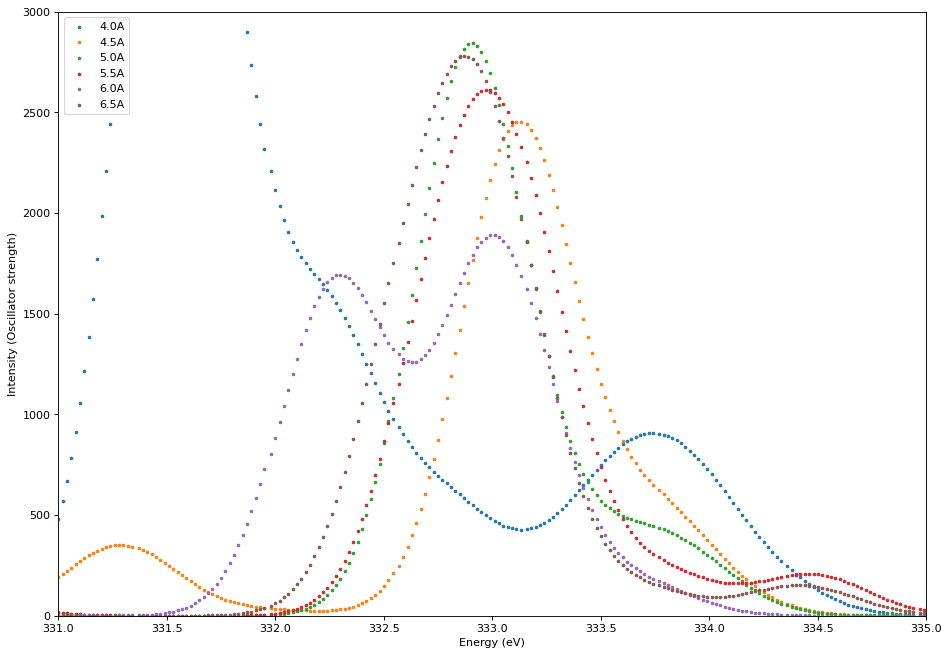

In [1187]:
fig = plt.figure(figsize=(14, 10), dpi=80)
n5 = fig.add_subplot(111)

for ii in list_suf_middle8:
    n5.scatter(globals()['fy_%s' % str(ii)][['Energy']], globals()['fy_%s' % str(ii)][['Intensity']], s=5, label=str(ii/10)+'A')
    
plt.xlabel('Energy (eV)')
plt.ylabel('Intensity (Oscillator strength)')
plt.legend(loc='upper left');
plt.xlim([331,335])
plt.ylim([0,3000])

plt.show()

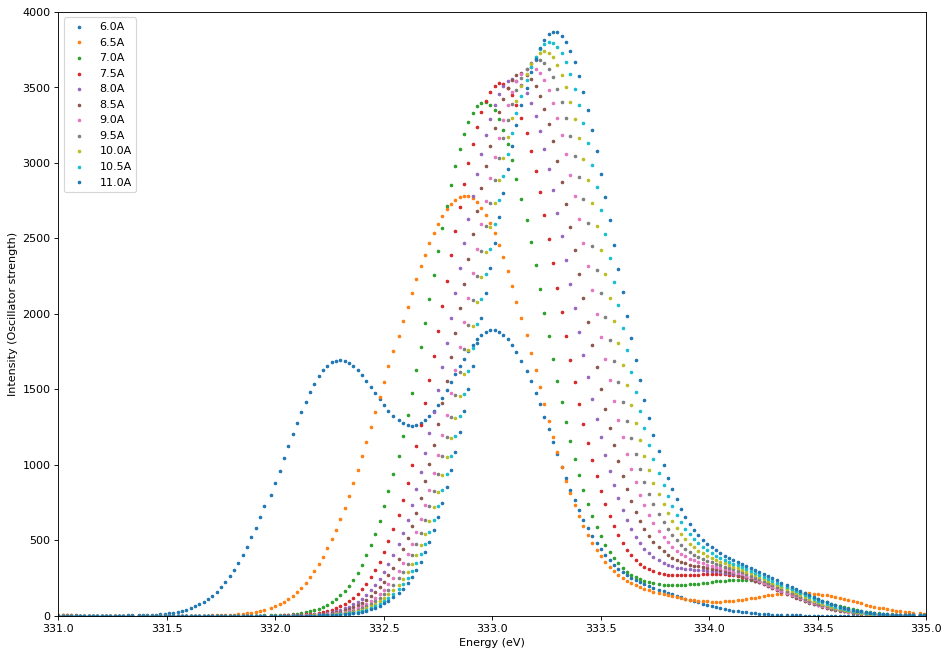

In [982]:
fig = plt.figure(figsize=(14, 10), dpi=80)
n5 = fig.add_subplot(111)

for ii in list_suf_long8:
    n5.scatter(globals()['fy_%s' % str(ii)][['Energy']], globals()['fy_%s' % str(ii)][['Intensity']], s=5, label=str(ii/10)+'A')
    
plt.xlabel('Energy (eV)')
plt.ylabel('Intensity (Oscillator strength)')
plt.legend(loc='upper left');
plt.xlim([331,335])
plt.ylim([0,4000])

plt.show()

### Relative intensities

In [16]:
max_10fy = g10fy[['Intensity']].max()
max_9fy = g9fgy[['Intensity']].max()
max_8fy = g8fg2y[['Intensity']].max()
max_7fy = g7fg3y[['Intensity']].max()
max_6fy = g6fg4y[['Intensity']].max()
max_5fy = g5fg5y[['Intensity']].max()
max_4fy = g4fg6y[['Intensity']].max()
max_3fy = g3fg7y[['Intensity']].max()
max_2fy = g2fg8y[['Intensity']].max()
max_10f = g10fg[['Intensity']].max()
max_10y = g11y[['Intensity']].max()

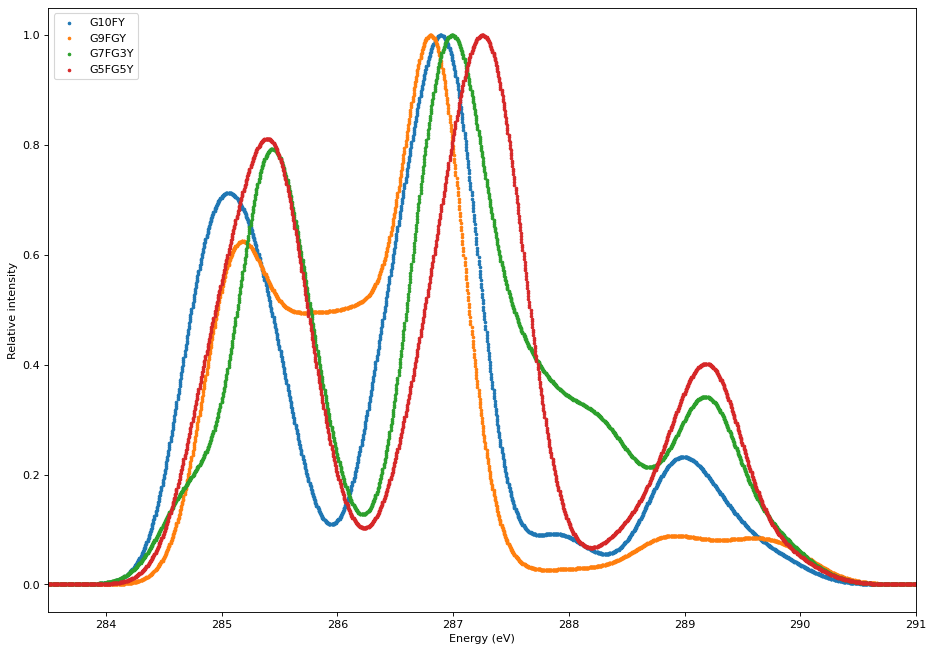

In [48]:
#add yft and yfc to see a broader energy range
fig = plt.figure(figsize=(14, 10), dpi=80)
n2 = fig.add_subplot(111)
n2.scatter(g10fy[['Energy']],g10fy[['Intensity']]/max_10fy, s=5, label='G10FY')
n2.scatter(g9fgy[['Energy']],g9fgy[['Intensity']]/max_9fy, s=5, label='G9FGY')
#n2.scatter(g8fg2y[['Energy']],g8fg2y[['Intensity']]/max_8fy, s=5, label='G8FG2Y')
n2.scatter(g7fg3y[['Energy']],g7fg3y[['Intensity']]/max_7fy, s=5, label='G7FG3Y')
#n2.scatter(g6fg4y[['Energy']],g6fg4y[['Intensity']]/max_6fy, s=5, label='G6FG4Y')
n2.scatter(g5fg5y[['Energy']],g5fg5y[['Intensity']]/max_5fy, s=5, label='G5FG5Y')
#n2.scatter(g4fg6y[['Energy']],g4fg6y[['Intensity']]/max_4fy, s=5, label='G4FG6Y')
#n2.scatter(g3fg7y[['Energy']],g3fg7y[['Intensity']]/max_3fy, s=5, label='G3FG7Y')
#n2.scatter(g2fg8y[['Energy']],g2fg8y[['Intensity']]/max_2fy, s=5, label='G2FG8Y')

plt.xlabel('Energy (eV)')
plt.ylabel('Relative intensity')
plt.legend(loc='upper left');
plt.xlim([283.5,291])
plt.show()

In [46]:
#Uncomment the original range to see more peaks outside the expected range
file="w.02/"
post=".csv"
g10py_02 = pd.read_csv(file+'G10PY'+post, delimiter=',')
g10py_01 = pd.read_csv(file+'G10PY_1'+post, delimiter=',')
g10py_005 = pd.read_csv(file+'G10PY_05'+post, delimiter=',')
g10py_001 = pd.read_csv(file+'G10PY_01'+post, delimiter=',')

g10py_02.columns = ['Energy', 'Intensity', 'dx', 'dy', 'dz']
g10py_01.columns = ['Energy', 'Intensity', 'dx', 'dy', 'dz']
g10py_005.columns = ['Energy', 'Intensity', 'dx', 'dy', 'dz']
g10py_001.columns = ['Energy', 'Intensity', 'dx', 'dy', 'dz']

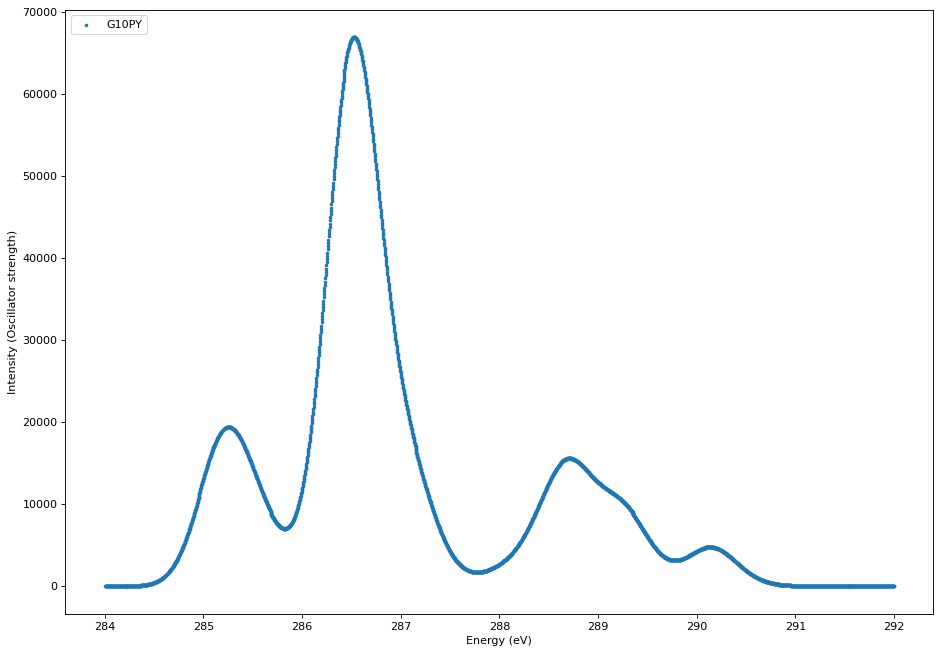

In [88]:
#add yft and yfc to see a broader energy range
fig = plt.figure(figsize=(14, 10), dpi=80)
n2 = fig.add_subplot(111)
n2.scatter(g10py[['Energy']],g10py[['Intensity']], s=5, label='G10PY')
#n2.scatter(g10py_02[['Energy']],g10py_02[['Intensity']], s=5, label='G10PY w 0.2')
#n2.scatter(g10py_01[['Energy']],g10py_01[['Intensity']], s=5, label='G10PY w 0.1')
#n2.scatter(g10py_005[['Energy']],g10py_005[['Intensity']]/1, s=5, label='G10PY w 0.05')
#n2.scatter(g10py_001[['Energy']],g10py_001[['Intensity']]/1, s=5, label='G10PY w 0.01')
plt.xlabel('Energy (eV)')
plt.ylabel('Intensity (Oscillator strength)')
plt.legend(loc='upper left');
#plt.xlim([289.5,289.9])
plt.show()